## Dapatkan Data dari GDELT dengan bigQuery

In [43]:
SELECT string(MonthYear) MonthYear, EventRootCode, QuadClass , c AS CountEvent, INTEGER(norm*100000)/1000 Intensity, SumNumArticles, RerataAvgTone
FROM (
SELECT ActionGeo_CountryCode, QuadClass, EventRootCode, MonthYear, SUM(NumArticles) AS SumNumArticles, AVG(AvgTone) AS RerataAvgTone, COUNT(1) AS c, RATIO_TO_REPORT(c) OVER(PARTITION BY MonthYear ORDER BY c DESC) norm FROM [gdelt-bq:full.events]
WHERE ActionGeo_CountryCode='ID' AND Year BETWEEN 1999 AND 2018
GROUP BY ActionGeo_CountryCode, EventRootCode, MonthYear, QuadClass 
)
ORDER BY ActionGeo_CountryCode, EventRootCode, MonthYear;

SyntaxError: invalid syntax (<ipython-input-43-77f6dc7fd7c3>, line 1)

In [ ]:
SELECT string(MonthYear) MonthYear, EventRootCode, QuadClass , CountEventNegativeTone, CountEventPositiveTone, SumNumNegativeArticle, SumNumPositiveArticle
FROM (
SELECT ActionGeo_CountryCode, QuadClass, EventRootCode, MonthYear, COUNT(CASE WHEN AvgTone < 0 THEN 1 ELSE null END) AS CountEventNegativeTone,COUNT(CASE WHEN AvgTone >= 0 THEN 1 ELSE null END) AS CountEventPositiveTone, SUM(CASE WHEN AvgTone < 0 THEN IFNULL(NumArticles,0) ELSE 0 END) AS SumNumNegativeArticle, SUM(CASE WHEN AvgTone >= 0 THEN IFNULL(NumArticles,0) ELSE 0 END) AS SumNumPositiveArticle FROM [gdelt-bq:full.events]
WHERE ActionGeo_CountryCode='ID' AND Year BETWEEN 1999 AND 2018
GROUP BY ActionGeo_CountryCode, EventRootCode, MonthYear, QuadClass 
)
ORDER BY ActionGeo_CountryCode, EventRootCode, MonthYear;

## transform data 
buat satu dataset dengan variabel variabel yang akan diteliti
apakah ada hubungan antara variabel nilai ekspor impor dengan sentiment dunia, jumlah artikel yang dipublish, jumlah artikel negatif, jumlah artikel positif, jumlah event dengan sentiment negatif, jumlah event dengan sentiment positif, jumlah event dalam kategori VerbalCooperation, jumlah event dalam kategori Material Cooperation, jumlah event dalam kategori conflict baik verbal maupun material, dan jumlah event yang berkaitan dengan klasifikasi taksonomi CAMEO

In [ ]:
SELECT e.MonthYear,
	e.nilai_ekspor,
	e.nilai_impor,
	g1.AvgTone,
	g1.NumArticle,
	g1.NumNegativeArticle,
	g1.NumPositiveArticle,
	g1.CountEventNegativeTone,
	g1.CountEventPositiveTone,
	g1.CountEventVerbalCooperation,
	g1.CountEventMaterialCooperation,
	g1.CountEventVerbalConflict,
	g1.CountEventMaterialConflict,
	g1.CountEvent01,
	g1.CountEvent02,
	g1.CountEvent03,
	g1.CountEvent04,
	g1.CountEvent05,
	g1.CountEvent06,
	g1.CountEvent07,
	g1.CountEvent08,
	g1.CountEvent09,
	g1.CountEvent10,
	g1.CountEvent11,
	g1.CountEvent12,
	g1.CountEvent13,
	g1.CountEvent14,
	g1.CountEvent15,
	g1.CountEvent16,
	g1.CountEvent17,
	g1.CountEvent18,
	g1.CountEvent19,
	g1.CountEvent20
FROM
(
	SELECT (CASE WHEN LENGTH(bulan) = 1 THEN CONCAT(tahun,'0',bulan) ELSE CONCAT(tahun,bulan) END) AS MonthYear, nilai_ekspor, nilai_impor
	FROM tabel_eksim
)e
LEFT JOIN
(
	SELECT MonthYear,AVG(RerataAvgTone) AS AvgTone, SUM(SumNumArticles) AS NumArticle,
				SUM(SumNumNegativeArticle) AS NumNegativeArticle,
				SUM(SumNumPositiveArticle) AS NumPositiveArticle,
				SUM(CountEventNegativeTone) AS CountEventNegativeTone,
				SUM(CountEventPositiveTone) AS CountEventPositiveTone,
				SUM(CASE WHEN QuadClass = 1 THEN CountEvent ELSE 0 END) AS CountEventVerbalCooperation,
				SUM(CASE WHEN QuadClass = 2 THEN CountEvent ELSE 0 END) AS CountEventMaterialCooperation,
				SUM(CASE WHEN QuadClass = 3 THEN CountEvent ELSE 0 END) AS CountEventVerbalConflict,
				SUM(CASE WHEN QuadClass = 4 THEN CountEvent ELSE 0 END) AS CountEventMaterialConflict,
				SUM(CASE WHEN EventRootCode = '01' THEN CountEvent ELSE 0 END) AS CountEvent01,
				SUM(CASE WHEN EventRootCode = '02' THEN CountEvent ELSE 0 END) AS CountEvent02,
				SUM(CASE WHEN EventRootCode = '03' THEN CountEvent ELSE 0 END) AS CountEvent03,
				SUM(CASE WHEN EventRootCode = '04' THEN CountEvent ELSE 0 END) AS CountEvent04,
				SUM(CASE WHEN EventRootCode = '05' THEN CountEvent ELSE 0 END) AS CountEvent05,
				SUM(CASE WHEN EventRootCode = '06' THEN CountEvent ELSE 0 END) AS CountEvent06,
				SUM(CASE WHEN EventRootCode = '07' THEN CountEvent ELSE 0 END) AS CountEvent07,
				SUM(CASE WHEN EventRootCode = '08' THEN CountEvent ELSE 0 END) AS CountEvent08,
				SUM(CASE WHEN EventRootCode = '09' THEN CountEvent ELSE 0 END) AS CountEvent09,
				SUM(CASE WHEN EventRootCode = '10' THEN CountEvent ELSE 0 END) AS CountEvent10,
				SUM(CASE WHEN EventRootCode = '11' THEN CountEvent ELSE 0 END) AS CountEvent11,
				SUM(CASE WHEN EventRootCode = '12' THEN CountEvent ELSE 0 END) AS CountEvent12,
				SUM(CASE WHEN EventRootCode = '13' THEN CountEvent ELSE 0 END) AS CountEvent13,
				SUM(CASE WHEN EventRootCode = '14' THEN CountEvent ELSE 0 END) AS CountEvent14,
				SUM(CASE WHEN EventRootCode = '15' THEN CountEvent ELSE 0 END) AS CountEvent15,
				SUM(CASE WHEN EventRootCode = '16' THEN CountEvent ELSE 0 END) AS CountEvent16,
				SUM(CASE WHEN EventRootCode = '17' THEN CountEvent ELSE 0 END) AS CountEvent17,
				SUM(CASE WHEN EventRootCode = '18' THEN CountEvent ELSE 0 END) AS CountEvent18,
				SUM(CASE WHEN EventRootCode = '19' THEN CountEvent ELSE 0 END) AS CountEvent19,
				SUM(CASE WHEN EventRootCode = '20' THEN CountEvent ELSE 0 END) AS CountEvent20
	FROM gdelt_events_aggregate
	GROUP BY MonthYear
)g1
ON e.MonthYear = g1.MonthYear

In [12]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

host = '127.0.0.1'
port = "3306"
user = 'root'
password = ''
database = 'group_project'

# conn = pymysql.connect(
#     host=host,
#     port=int(port),
#     user=user,
#     passwd=password,
#     db=database,
#     charset='utf8mb4')

# def run(sql):
#     df = pd.read_sql_query(sql,conn)
#     return df

engine = create_engine('mysql+pymysql://'+user+':'+password+'@'+host+':'+port+'/'+database)
'''engine = create_engine('mysql+pymysql://root:@localhost:3306/classicmodels')'''

def run(sql):
    df = pd.read_sql_query(sql, engine)
    return df

menambahkan variable persentase_perubahan_nilai_ekspor dan persentase_perubahan_nilai_impor

In [16]:
df = run("SELECT * FROM gdelt_transform_variabel")

# fungsi untuk menghitung persentase perubahan
def calculatePersenPerubahan(v_n_min_1, v_n):
    persentase = 0
    if v_n_min_1 > 0:
        persentase = (v_n-v_n_min_1)*100.00/v_n_min_1
    return persentase

ekspor_n_min_1 = 0
impor_n_min_1 = 0
for index, row in df.iterrows():
    if index>0:
        persen_ubah_ekspor = calculatePersenPerubahan(ekspor_n_min_1, row['nilai_ekspor'])
        persen_ubah_impor = calculatePersenPerubahan(impor_n_min_1, row['nilai_impor'])
#         print(persen_ubah_ekspor, persen_ubah_impor)
        sql = "UPDATE gdelt_transform_variabel SET persentase_perubahan_nilai_ekspor="+str(persen_ubah_ekspor)+", persentase_perubahan_nilai_impor="+str(persen_ubah_impor)+" WHERE MonthYear = '"+str(row['MonthYear'])+"'"
        engine.execute(sql)
    ekspor_n_min_1 = row['nilai_ekspor']
    impor_n_min_1 = row['nilai_impor']
#     if index>0:
#         persen_ubah_ekspor = calculatePersenPerubahan
#     print(index)
#     print(row['MonthYear'], row['persentase_perubahan_nilai_ekspor'])

## Cleaning Data

In [2]:
# get data
df = run("SELECT * FROM gdelt_transform_variabel")
df.head()

,MonthYear,nilai_ekspor,nilai_impor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
0,199901,3.017850e+09,1.772190e+09,4.48447,27813.0,0.0,27813.0,0.0,4815.0,2530.0,...,296.0,158.0,66.0,81.0,47.0,47.0,318.0,180.0,483.0,7.0
1,199902,3.194990e+09,1.808710e+09,4.65879,29952.0,0.0,29952.0,0.0,5497.0,3420.0,...,283.0,215.0,109.0,64.0,50.0,53.0,211.0,74.0,437.0,0.0
2,199903,3.952970e+09,1.976420e+09,4.46642,36529.0,0.0,36529.0,0.0,6691.0,3913.0,...,307.0,201.0,65.0,156.0,74.0,54.0,284.0,136.0,794.0,3.0
3,199904,3.886120e+09,2.121890e+09,4.59195,35224.0,0.0,35224.0,0.0,6702.0,3810.0,...,421.0,221.0,164.0,122.0,48.0,29.0,261.0,189.0,922.0,34.0
4,199905,4.041270e+09,1.959120e+09,5.27258,34705.0,0.0,34705.0,0.0,6290.0,3585.0,...,366.0,196.0,103.0,153.0,43.0,62.0,230.0,200.0,582.0,11.0


In [3]:
df.describe()

,nilai_ekspor,nilai_impor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,CountEventMaterialCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
count,2.400000e+02,2.400000e+02,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,1.008460e+10,8.590909e+09,2.970250,1.268709e+05,57439.163180,69431.702929,3617.016736,9956.439331,8428.907950,1480.288703,...,759.384937,312.757322,194.271967,134.259414,70.154812,124.083682,890.924686,208.460251,761.401674,3.644351
std,4.466817e+09,5.214495e+09,2.952155,1.557104e+05,139083.408853,66268.013524,7924.146104,6157.252767,6405.337716,1191.075535,...,508.940094,256.488700,145.224476,130.575261,55.398149,135.722318,685.049562,204.039885,473.273241,6.237178
min,0.000000e+00,0.000000e+00,-3.905430,3.382000e+03,0.000000,3333.000000,0.000000,1330.000000,1297.000000,218.000000,...,163.000000,41.000000,30.000000,7.000000,6.000000,11.000000,144.000000,30.000000,154.000000,0.000000
25%,5.290320e+09,3.340072e+09,2.253195,2.834200e+04,0.000000,27944.000000,0.000000,5732.000000,3337.000000,517.000000,...,358.000000,135.500000,88.000000,51.500000,36.500000,47.500000,340.500000,86.500000,419.500000,0.000000
50%,1.017190e+10,8.749000e+09,4.539750,4.423000e+04,0.000000,43762.000000,0.000000,7866.000000,5226.000000,927.000000,...,557.000000,225.000000,153.000000,110.000000,57.000000,83.000000,663.000000,156.000000,656.000000,2.000000
75%,1.430285e+10,1.318082e+10,4.829350,1.718550e+05,844.000000,97533.000000,29.500000,13629.000000,12380.000000,2187.000000,...,1057.000000,407.500000,247.500000,168.000000,81.000000,151.000000,1262.500000,246.000000,996.000000,5.000000
max,1.864780e+10,1.829710e+10,5.397680,1.022104e+06,916718.000000,510573.000000,41323.000000,37099.000000,34374.000000,5981.000000,...,3100.000000,1946.000000,949.000000,1160.000000,454.000000,1123.000000,4472.000000,1354.000000,3527.000000,51.000000


### Cek adanya missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 33 columns):
MonthYear                        240 non-null object
nilai_ekspor                     240 non-null float64
nilai_impor                      240 non-null float64
AvgTone                          239 non-null float64
NumArticle                       239 non-null float64
NumNegativeArticle               239 non-null float64
NumPositiveArticle               239 non-null float64
CountEventNegativeTone           239 non-null float64
CountEventPositiveTone           239 non-null float64
CountEventVerbalCooperation      239 non-null float64
CountEventMaterialCooperation    239 non-null float64
CountEventVerbalConflict         239 non-null float64
CountEventMaterialConflict       239 non-null float64
CountEvent01                     239 non-null float64
CountEvent02                     239 non-null float64
CountEvent03                     239 non-null float64
CountEvent04                    

dapat dilihat bahwa seharusnya ada 240 baris namun ada beberapa variabel yang tidak ada nilainya untuk bulan tertentu dilihat dari jumlah baris non-null nya < 240, maka untuk baris/bulan yang null akan dikeluarkan dari data

In [5]:
#Removing all null values row
df = df.dropna(subset=['AvgTone', 'NumArticle', 'NumNegativeArticle', 'NumPositiveArticle', 'CountEventNegativeTone', 'CountEventPositiveTone','CountEventVerbalCooperation','CountEventMaterialCooperation','CountEventVerbalConflict','CountEventMaterialConflict','CountEvent01','CountEvent02','CountEvent03','CountEvent04','CountEvent05','CountEvent06','CountEvent07','CountEvent08','CountEvent09','CountEvent10','CountEvent11','CountEvent12','CountEvent13','CountEvent14','CountEvent15','CountEvent16','CountEvent17','CountEvent18','CountEvent19','CountEvent20'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 33 columns):
MonthYear                        239 non-null object
nilai_ekspor                     239 non-null float64
nilai_impor                      239 non-null float64
AvgTone                          239 non-null float64
NumArticle                       239 non-null float64
NumNegativeArticle               239 non-null float64
NumPositiveArticle               239 non-null float64
CountEventNegativeTone           239 non-null float64
CountEventPositiveTone           239 non-null float64
CountEventVerbalCooperation      239 non-null float64
CountEventMaterialCooperation    239 non-null float64
CountEventVerbalConflict         239 non-null float64
CountEventMaterialConflict       239 non-null float64
CountEvent01                     239 non-null float64
CountEvent02                     239 non-null float64
CountEvent03                     239 non-null float64
CountEvent04                    

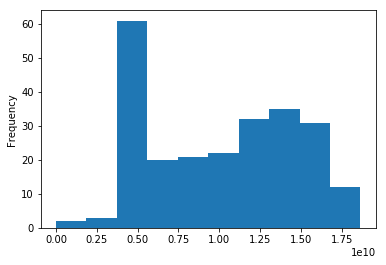

In [20]:
ekspor = df["nilai_ekspor"]
ekspor.plot.hist()

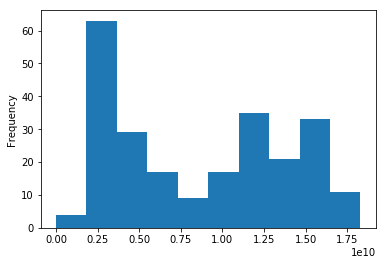

In [21]:
ekspor = df["nilai_impor"]
ekspor.plot.hist()

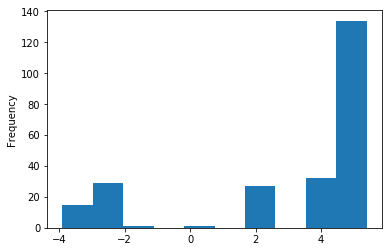

In [22]:
avgtone = df["AvgTone"]
avgtone.plot.hist()

### normalisasi data

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
X = df[['nilai_impor','nilai_ekspor','AvgTone', 'NumArticle', 'NumNegativeArticle', 'NumPositiveArticle', 'CountEventNegativeTone', 'CountEventPositiveTone','CountEventVerbalCooperation','CountEventMaterialCooperation','CountEventVerbalConflict','CountEventMaterialConflict','CountEvent01','CountEvent02','CountEvent03','CountEvent04','CountEvent05','CountEvent06','CountEvent07','CountEvent08','CountEvent09','CountEvent10','CountEvent11','CountEvent12','CountEvent13','CountEvent14','CountEvent15','CountEvent16','CountEvent17','CountEvent18','CountEvent19','CountEvent20']].values.astype(np.float64)
scaler = MinMaxScaler()
print("Scaling")
print(scaler.fit_transform(X))
normalizeDf = pd.DataFrame(scaler.fit_transform(X),columns = ['nilai_impor','nilai_ekspor','AvgTone', 'NumArticle', 'NumNegativeArticle', 'NumPositiveArticle', 'CountEventNegativeTone', 'CountEventPositiveTone','CountEventVerbalCooperation','CountEventMaterialCooperation','CountEventVerbalConflict','CountEventMaterialConflict','CountEvent01','CountEvent02','CountEvent03','CountEvent04','CountEvent05','CountEvent06','CountEvent07','CountEvent08','CountEvent09','CountEvent10','CountEvent11','CountEvent12','CountEvent13','CountEvent14','CountEvent15','CountEvent16','CountEvent17','CountEvent18','CountEvent19','CountEvent20'])
normalizeDf.describe()

Scaling
[[0.09685633 0.1618341  0.9018382  ... 0.11329305 0.09753928 0.1372549 ]
 [0.09885228 0.17133335 0.92057602 ... 0.03323263 0.08390157 0.        ]
 [0.10801821 0.2119805  0.89989799 ... 0.08006042 0.18974207 0.05882353]
 ...
 [0.79849266 0.80030888 0.20945576 ... 0.14274924 0.11858879 0.05882353]
 [0.         0.         0.14480964 ... 0.17296073 0.23747406 0.09803922]
 [0.         0.         0.11292998 ... 0.05740181 0.02520012 0.        ]]


,nilai_impor,nilai_ekspor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,CountEventMaterialCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.471488,0.543056,0.739073,0.121219,0.062657,0.130311,0.087530,0.241171,0.215615,0.219033,...,0.203059,0.142655,0.178751,0.110372,0.143203,0.101694,0.172580,0.134789,0.180078,0.071458
std,0.283955,0.237454,0.317330,0.152849,0.151719,0.130644,0.191761,0.172139,0.193649,0.206676,...,0.173286,0.134640,0.158024,0.113248,0.123657,0.122052,0.158283,0.154109,0.140312,0.122298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.183972,0.284851,0.661996,0.024501,0.000000,0.048519,0.000000,0.123067,0.061674,0.051883,...,0.066394,0.049606,0.063112,0.038595,0.068080,0.032824,0.045402,0.042674,0.078713,0.000000
50%,0.481752,0.552558,0.907780,0.040097,0.000000,0.079704,0.000000,0.182728,0.118783,0.123026,...,0.134150,0.096588,0.133841,0.089332,0.113839,0.064748,0.119917,0.095166,0.148829,0.039216
75%,0.722243,0.767554,0.938910,0.165377,0.000921,0.185711,0.000714,0.343845,0.335067,0.341662,...,0.304392,0.192388,0.236670,0.139636,0.167411,0.125899,0.258433,0.163142,0.249629,0.098039
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cek hubungan antar variable dalam dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE48DE8D68>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

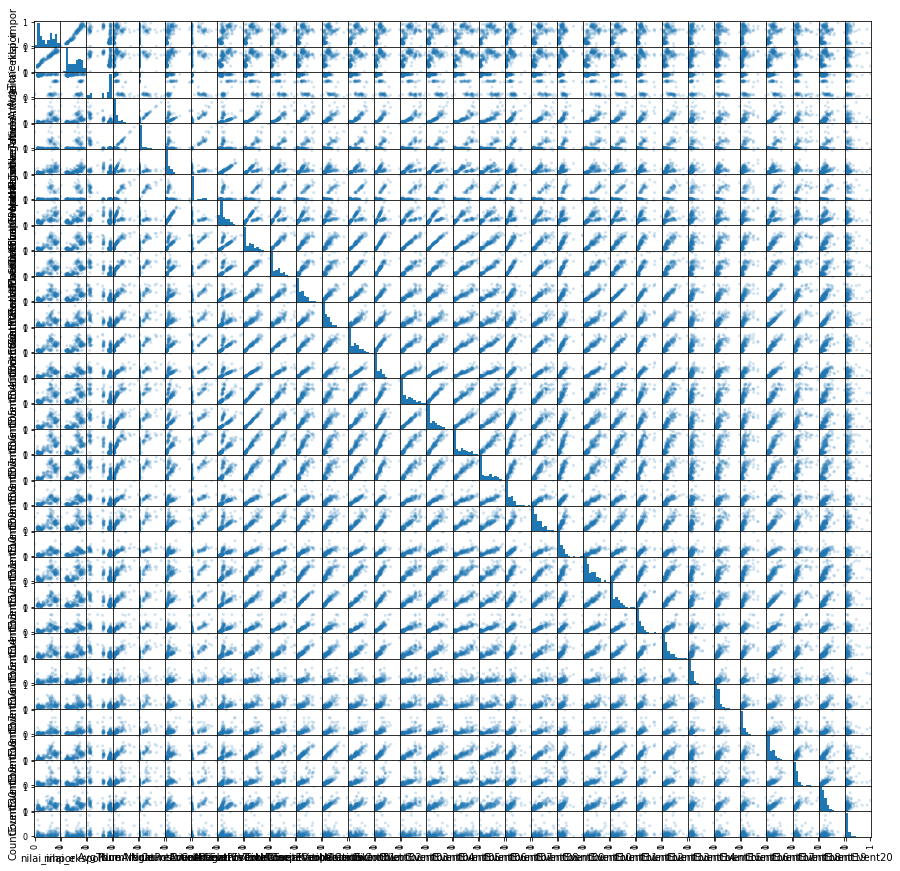

In [30]:
# Membuat matrix scatter plot antar variabel numerik yang ada dalam DataFrame
pd.plotting.scatter_matrix(normalizeDf, alpha=0.2, figsize=(15,15))

In [31]:
normalizeDf.corr()

,nilai_impor,nilai_ekspor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,CountEventMaterialCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
nilai_impor,1.000000,0.975979,-0.431044,0.483056,0.256914,0.595829,0.304706,0.649821,0.655992,0.642337,...,0.614558,0.511700,0.479668,0.401634,0.355717,0.422683,0.626926,0.385754,0.422869,0.113220
nilai_ekspor,0.975979,1.000000,-0.364119,0.440267,0.213417,0.586579,0.264721,0.648626,0.622778,0.608473,...,0.586082,0.479054,0.447140,0.393253,0.334996,0.421982,0.603912,0.352526,0.390277,0.085540
AvgTone,-0.431044,-0.364119,1.000000,-0.791322,-0.826667,-0.124365,-0.907351,-0.063656,-0.766651,-0.725631,...,-0.721498,-0.619835,-0.731392,-0.456394,-0.615877,-0.506150,-0.729612,-0.616733,-0.594011,-0.321341
NumArticle,0.483056,0.440267,-0.791322,1.000000,0.904995,0.450302,0.866484,0.387649,0.924528,0.901185,...,0.898550,0.868415,0.881523,0.523667,0.692402,0.744577,0.883901,0.768524,0.740936,0.278838
NumNegativeArticle,0.256914,0.213417,-0.826667,0.904995,1.000000,0.027671,0.957478,-0.018542,0.745857,0.687620,...,0.737315,0.687424,0.776304,0.410385,0.613440,0.592554,0.744463,0.689933,0.612637,0.270132
NumPositiveArticle,0.595829,0.586579,-0.124365,0.450302,0.027671,1.000000,0.026427,0.949777,0.606964,0.674343,...,0.563851,0.597754,0.442014,0.369148,0.339453,0.505883,0.514428,0.357774,0.455177,0.088235
CountEventNegativeTone,0.304706,0.264721,-0.907351,0.866484,0.957478,0.026427,1.000000,-0.022271,0.780094,0.712730,...,0.759510,0.679133,0.789780,0.474007,0.674710,0.573034,0.778840,0.710266,0.635898,0.307638
CountEventPositiveTone,0.649821,0.648626,-0.063656,0.387649,-0.018542,0.949777,-0.022271,1.000000,0.601415,0.634048,...,0.573162,0.579092,0.446398,0.400383,0.325829,0.479681,0.514110,0.345129,0.463341,0.111974
CountEventVerbalCooperation,0.655992,0.622778,-0.766651,0.924528,0.745857,0.606964,0.780094,0.601415,1.000000,0.958039,...,0.940709,0.883628,0.882246,0.614887,0.713364,0.744368,0.920362,0.750325,0.756030,0.306653
CountEventMaterialCooperation,0.642337,0.608473,-0.725631,0.901185,0.687620,0.674343,0.712730,0.634048,0.958039,1.000000,...,0.897520,0.855896,0.837507,0.564255,0.672300,0.701779,0.876406,0.691730,0.722137,0.299909


In [32]:
matriksKorelasi = normalizeDf.corr()
writer = pd.ExcelWriter('matriks_korelasi_antar_variable_normalize.xlsx')
matriksKorelasi.to_excel(writer,'Sheet1',index=False)
writer.save()

### Skenario 2: yang diambil adalah hubungan persentase perubahan ekspor impor

In [35]:
df_perubahan = df[['persentase_perubahan_nilai_ekspor','persentase_perubahan_nilai_impor','AvgTone', 'NumArticle', 'NumNegativeArticle', 'NumPositiveArticle', 'CountEventNegativeTone', 'CountEventPositiveTone','CountEventVerbalCooperation','CountEventMaterialCooperation','CountEventVerbalConflict','CountEventMaterialConflict','CountEvent01','CountEvent02','CountEvent03','CountEvent04','CountEvent05','CountEvent06','CountEvent07','CountEvent08','CountEvent09','CountEvent10','CountEvent11','CountEvent12','CountEvent13','CountEvent14','CountEvent15','CountEvent16','CountEvent17','CountEvent18','CountEvent19','CountEvent20']]
df_perubahan

,persentase_perubahan_nilai_ekspor,persentase_perubahan_nilai_impor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,CountEventMaterialCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
0,0.000000,0.000000,4.48447,27813.0,0.0,27813.0,0.0,4815.0,2530.0,477.0,...,296.0,158.0,66.0,81.0,47.0,47.0,318.0,180.0,483.0,7.0
1,5.869740,2.060730,4.65879,29952.0,0.0,29952.0,0.0,5497.0,3420.0,487.0,...,283.0,215.0,109.0,64.0,50.0,53.0,211.0,74.0,437.0,0.0
2,23.724000,9.272350,4.46642,36529.0,0.0,36529.0,0.0,6691.0,3913.0,575.0,...,307.0,201.0,65.0,156.0,74.0,54.0,284.0,136.0,794.0,3.0
3,-1.691130,7.360280,4.59195,35224.0,0.0,35224.0,0.0,6702.0,3810.0,355.0,...,421.0,221.0,164.0,122.0,48.0,29.0,261.0,189.0,922.0,34.0
4,3.992410,-7.670990,5.27258,34705.0,0.0,34705.0,0.0,6290.0,3585.0,637.0,...,366.0,196.0,103.0,153.0,43.0,62.0,230.0,200.0,582.0,11.0
5,-11.041800,-3.206540,5.24643,35848.0,0.0,35848.0,0.0,6148.0,3700.0,645.0,...,431.0,228.0,120.0,78.0,27.0,40.0,245.0,130.0,419.0,1.0
6,17.768900,5.838210,4.59823,35106.0,0.0,35106.0,0.0,6335.0,3797.0,518.0,...,441.0,222.0,93.0,90.0,39.0,47.0,170.0,163.0,614.0,11.0
7,9.211020,1.836560,4.63790,43307.0,0.0,43307.0,0.0,7550.0,4079.0,575.0,...,531.0,274.0,146.0,112.0,54.0,90.0,228.0,221.0,1073.0,10.0
8,-1.875070,5.427450,5.02486,115775.0,0.0,115775.0,0.0,19589.0,11228.0,2128.0,...,1182.0,737.0,436.0,465.0,190.0,315.0,610.0,277.0,1597.0,51.0
9,2.227620,-4.954980,4.97535,51650.0,0.0,51650.0,0.0,8908.0,5120.0,920.0,...,538.0,333.0,161.0,233.0,80.0,92.0,275.0,180.0,800.0,6.0


In [19]:
df_perubahan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 32 columns):
persentase_perubahan_nilai_ekspor    238 non-null float64
persentase_perubahan_nilai_impor     238 non-null float64
AvgTone                              239 non-null float64
NumArticle                           239 non-null float64
NumNegativeArticle                   239 non-null float64
NumPositiveArticle                   239 non-null float64
CountEventNegativeTone               239 non-null float64
CountEventPositiveTone               239 non-null float64
CountEventVerbalCooperation          239 non-null float64
CountEventMaterialCooperation        239 non-null float64
CountEventVerbalConflict             239 non-null float64
CountEventMaterialConflict           239 non-null float64
CountEvent01                         239 non-null float64
CountEvent02                         239 non-null float64
CountEvent03                         239 non-null float64
CountEvent04             

In [20]:
df_perubahan.dropna()

,persentase_perubahan_nilai_ekspor,persentase_perubahan_nilai_impor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,CountEventMaterialCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
0,0.000000,0.000000,4.48447,27813.0,0.0,27813.0,0.0,4815.0,2530.0,477.0,...,296.0,158.0,66.0,81.0,47.0,47.0,318.0,180.0,483.0,7.0
1,5.869740,2.060730,4.65879,29952.0,0.0,29952.0,0.0,5497.0,3420.0,487.0,...,283.0,215.0,109.0,64.0,50.0,53.0,211.0,74.0,437.0,0.0
2,23.724000,9.272350,4.46642,36529.0,0.0,36529.0,0.0,6691.0,3913.0,575.0,...,307.0,201.0,65.0,156.0,74.0,54.0,284.0,136.0,794.0,3.0
3,-1.691130,7.360280,4.59195,35224.0,0.0,35224.0,0.0,6702.0,3810.0,355.0,...,421.0,221.0,164.0,122.0,48.0,29.0,261.0,189.0,922.0,34.0
4,3.992410,-7.670990,5.27258,34705.0,0.0,34705.0,0.0,6290.0,3585.0,637.0,...,366.0,196.0,103.0,153.0,43.0,62.0,230.0,200.0,582.0,11.0
5,-11.041800,-3.206540,5.24643,35848.0,0.0,35848.0,0.0,6148.0,3700.0,645.0,...,431.0,228.0,120.0,78.0,27.0,40.0,245.0,130.0,419.0,1.0
6,17.768900,5.838210,4.59823,35106.0,0.0,35106.0,0.0,6335.0,3797.0,518.0,...,441.0,222.0,93.0,90.0,39.0,47.0,170.0,163.0,614.0,11.0
7,9.211020,1.836560,4.63790,43307.0,0.0,43307.0,0.0,7550.0,4079.0,575.0,...,531.0,274.0,146.0,112.0,54.0,90.0,228.0,221.0,1073.0,10.0
8,-1.875070,5.427450,5.02486,115775.0,0.0,115775.0,0.0,19589.0,11228.0,2128.0,...,1182.0,737.0,436.0,465.0,190.0,315.0,610.0,277.0,1597.0,51.0
9,2.227620,-4.954980,4.97535,51650.0,0.0,51650.0,0.0,8908.0,5120.0,920.0,...,538.0,333.0,161.0,233.0,80.0,92.0,275.0,180.0,800.0,6.0


In [21]:
df_perubahan.corr()

,persentase_perubahan_nilai_ekspor,persentase_perubahan_nilai_impor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,CountEventVerbalCooperation,CountEventMaterialCooperation,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
persentase_perubahan_nilai_ekspor,1.000000,0.716084,0.092504,-0.155980,-0.168593,-0.012716,-0.103745,-0.007174,-0.098022,-0.124846,...,-0.034383,-0.045263,-0.089144,-0.011569,-0.031549,-0.033204,-0.027444,-0.040895,-0.010058,-0.009928
persentase_perubahan_nilai_impor,0.716084,1.000000,0.070192,-0.144615,-0.137897,-0.050492,-0.080475,-0.034097,-0.092653,-0.124180,...,-0.038193,-0.057039,-0.103566,-0.022732,-0.056054,-0.044606,-0.024355,-0.043948,-0.022457,0.052120
AvgTone,0.092504,0.070192,1.000000,-0.791322,-0.826667,-0.124365,-0.907351,-0.063656,-0.766651,-0.725631,...,-0.721498,-0.619835,-0.731392,-0.456394,-0.615877,-0.506150,-0.729612,-0.616733,-0.594011,-0.321341
NumArticle,-0.155980,-0.144615,-0.791322,1.000000,0.904995,0.450302,0.866484,0.387649,0.924528,0.901185,...,0.898550,0.868415,0.881523,0.523667,0.692402,0.744577,0.883901,0.768524,0.740936,0.278838
NumNegativeArticle,-0.168593,-0.137897,-0.826667,0.904995,1.000000,0.027671,0.957478,-0.018542,0.745857,0.687620,...,0.737315,0.687424,0.776304,0.410385,0.613440,0.592554,0.744463,0.689933,0.612637,0.270132
NumPositiveArticle,-0.012716,-0.050492,-0.124365,0.450302,0.027671,1.000000,0.026427,0.949777,0.606964,0.674343,...,0.563851,0.597754,0.442014,0.369148,0.339453,0.505883,0.514428,0.357774,0.455177,0.088235
CountEventNegativeTone,-0.103745,-0.080475,-0.907351,0.866484,0.957478,0.026427,1.000000,-0.022271,0.780094,0.712730,...,0.759510,0.679133,0.789780,0.474007,0.674710,0.573034,0.778840,0.710266,0.635898,0.307638
CountEventPositiveTone,-0.007174,-0.034097,-0.063656,0.387649,-0.018542,0.949777,-0.022271,1.000000,0.601415,0.634048,...,0.573162,0.579092,0.446398,0.400383,0.325829,0.479681,0.514110,0.345129,0.463341,0.111974
CountEventVerbalCooperation,-0.098022,-0.092653,-0.766651,0.924528,0.745857,0.606964,0.780094,0.601415,1.000000,0.958039,...,0.940709,0.883628,0.882246,0.614887,0.713364,0.744368,0.920362,0.750325,0.756030,0.306653
CountEventMaterialCooperation,-0.124846,-0.124180,-0.725631,0.901185,0.687620,0.674343,0.712730,0.634048,0.958039,1.000000,...,0.897520,0.855896,0.837507,0.564255,0.672300,0.701779,0.876406,0.691730,0.722137,0.299909


In [22]:
matriksKorelasi = df_perubahan.corr()
writer = pd.ExcelWriter('matriks_korelasi_persentase_perubahan_nilai.xlsx')
matriksKorelasi.to_excel(writer,'Sheet1',index=False)
writer.save()

In [41]:
# df.dropna()
df_perubahan = run("select * from gdelt_transform_variabel")
df_perubahan.dropna()
df_perubahan.info()
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
X = df_perubahan[['persentase_perubahan_nilai_impor','persentase_perubahan_nilai_ekspor','nilai_impor','nilai_ekspor','AvgTone', 'NumArticle', 'NumNegativeArticle', 'NumPositiveArticle', 'CountEventNegativeTone', 'CountEventPositiveTone','CountEventVerbalCooperation','CountEventMaterialCooperation','CountEventVerbalConflict','CountEventMaterialConflict','CountEvent01','CountEvent02','CountEvent03','CountEvent04','CountEvent05','CountEvent06','CountEvent07','CountEvent08','CountEvent09','CountEvent10','CountEvent11','CountEvent12','CountEvent13','CountEvent14','CountEvent15','CountEvent16','CountEvent17','CountEvent18','CountEvent19','CountEvent20']].values.astype(np.float64)
scaler = MinMaxScaler()
print("Scaling")
print(scaler.fit_transform(X))
normalizeDf = pd.DataFrame(scaler.fit_transform(X),columns = ['persentase_perubahan_nilai_impor', 'persentase_perubahan_nilai_ekspor','nilai_impor','nilai_ekspor','AvgTone', 'NumArticle', 'NumNegativeArticle', 'NumPositiveArticle', 'CountEventNegativeTone', 'CountEventPositiveTone','CountEventVerbalCooperation','CountEventMaterialCooperation','CountEventVerbalConflict','CountEventMaterialConflict','CountEvent01','CountEvent02','CountEvent03','CountEvent04','CountEvent05','CountEvent06','CountEvent07','CountEvent08','CountEvent09','CountEvent10','CountEvent11','CountEvent12','CountEvent13','CountEvent14','CountEvent15','CountEvent16','CountEvent17','CountEvent18','CountEvent19','CountEvent20'])
normalizeDf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 35 columns):
MonthYear                            237 non-null object
nilai_ekspor                         237 non-null float64
persentase_perubahan_nilai_ekspor    237 non-null float64
nilai_impor                          237 non-null float64
persentase_perubahan_nilai_impor     237 non-null float64
AvgTone                              237 non-null float64
NumArticle                           237 non-null int64
NumNegativeArticle                   237 non-null int64
NumPositiveArticle                   237 non-null int64
CountEventNegativeTone               237 non-null int64
CountEventPositiveTone               237 non-null int64
CountEventVerbalCooperation          237 non-null int64
CountEventMaterialCooperation        237 non-null int64
CountEventVerbalConflict             237 non-null int64
CountEventMaterialConflict           237 non-null int64
CountEvent01                         237 non

,persentase_perubahan_nilai_impor,persentase_perubahan_nilai_ekspor,nilai_impor,nilai_ekspor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.382509,0.473455,0.419213,0.460296,0.744223,0.118874,0.059889,0.130603,0.085385,0.211015,...,0.203310,0.142908,0.178257,0.109902,0.139950,0.101770,0.172565,0.134954,0.180489,0.071647
std,0.114944,0.147455,0.312027,0.278124,0.313636,0.148767,0.146917,0.130940,0.189936,0.179186,...,0.173595,0.134870,0.157317,0.113055,0.124383,0.122436,0.158560,0.154658,0.140494,0.122714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316456,0.393501,0.100267,0.148967,0.665793,0.024129,0.000000,0.048557,0.000000,0.087917,...,0.067075,0.049869,0.063112,0.038161,0.065022,0.033273,0.044824,0.042296,0.078862,0.000000
50%,0.379386,0.466835,0.438427,0.481508,0.908918,0.039751,0.000000,0.079704,0.000000,0.149264,...,0.134150,0.096588,0.133841,0.089332,0.109865,0.064748,0.119917,0.095166,0.148829,0.039216
75%,0.436485,0.556802,0.696585,0.723998,0.939059,0.165180,0.000353,0.186231,0.000242,0.317589,...,0.305414,0.191601,0.235038,0.139636,0.165919,0.125899,0.258087,0.162387,0.252001,0.098039
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
normalizeDf.corr()

,persentase_perubahan_nilai_impor,persentase_perubahan_nilai_ekspor,nilai_impor,nilai_ekspor,AvgTone,NumArticle,NumNegativeArticle,NumPositiveArticle,CountEventNegativeTone,CountEventPositiveTone,...,CountEvent11,CountEvent12,CountEvent13,CountEvent14,CountEvent15,CountEvent16,CountEvent17,CountEvent18,CountEvent19,CountEvent20
persentase_perubahan_nilai_impor,1.000000,0.598944,0.084658,0.061490,0.009599,-0.024889,-0.005891,-0.044847,0.002774,-0.032471,...,-0.022803,-0.046646,-0.053895,0.033083,-0.063774,-0.035572,0.001094,-0.041564,-0.010661,0.068435
persentase_perubahan_nilai_ekspor,0.598944,1.000000,0.015281,0.062445,0.023192,-0.010233,-0.012335,0.001662,-0.005895,0.000054,...,-0.015353,-0.031607,-0.025977,0.062489,-0.038101,-0.020803,0.003537,-0.039180,0.007249,-0.001909
nilai_impor,0.084658,0.015281,1.000000,0.976917,-0.470992,0.531048,0.301525,0.600313,0.331748,0.651675,...,0.620932,0.515900,0.494928,0.415872,0.352940,0.427112,0.636107,0.388786,0.424190,0.112046
nilai_ekspor,0.061490,0.062445,0.976917,1.000000,-0.417181,0.501869,0.270850,0.595937,0.301198,0.654252,...,0.597570,0.486832,0.468788,0.414471,0.332470,0.430649,0.619505,0.358322,0.393487,0.083932
AvgTone,0.009599,0.023192,-0.470992,-0.417181,1.000000,-0.799389,-0.834787,-0.131277,-0.912983,-0.075364,...,-0.738039,-0.635394,-0.744052,-0.458748,-0.637139,-0.516280,-0.743306,-0.629318,-0.611410,-0.329980
NumArticle,-0.024889,-0.010233,0.531048,0.501869,-0.799389,1.000000,0.898910,0.459001,0.864105,0.397686,...,0.919416,0.889169,0.887701,0.517157,0.715198,0.761682,0.900956,0.789085,0.759298,0.284001
NumNegativeArticle,-0.005891,-0.012335,0.301525,0.270850,-0.834787,0.898910,1.000000,0.023348,0.960812,-0.021031,...,0.757427,0.706628,0.781809,0.400725,0.638765,0.608250,0.760988,0.712152,0.631207,0.277191
NumPositiveArticle,-0.044847,0.001662,0.600313,0.595937,-0.131277,0.459001,0.023348,1.000000,0.023392,0.950081,...,0.562022,0.596012,0.440214,0.367463,0.336659,0.504604,0.512679,0.356442,0.452611,0.085948
CountEventNegativeTone,0.002774,-0.005895,0.331748,0.301198,-0.912983,0.864105,0.960812,0.023392,1.000000,-0.023978,...,0.766239,0.685207,0.789103,0.466650,0.686287,0.577293,0.783566,0.718182,0.642762,0.310121
CountEventPositiveTone,-0.032471,0.000054,0.651675,0.654252,-0.075364,0.397686,-0.021031,0.950081,-0.023978,1.000000,...,0.571124,0.576884,0.444762,0.399755,0.321224,0.478484,0.512471,0.343646,0.459780,0.108902
